In [17]:
import train
import numpy as np
import api.capital_features_api as cf
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import mplfinance as mpf

In [2]:
train_up_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144589)
validation_up_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144590)
train_down_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144591)
validation_down_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144592)

In [3]:
Y_up_train = train_up_data['upSignals']
Y_up_val = validation_up_data['upSignals']
Y_down_train = train_down_data['downSignals']
Y_down_val = validation_down_data['downSignals']

In [4]:
train_up_dataset, validation_up_dataset, scaler_up = train.to_dataset(train_up_data, validation_up_data, Y_up_train, Y_up_val)
train_down_dataset, validation_down_dataset, scaler_down = train.to_dataset(train_down_data, validation_down_data, Y_down_train, Y_down_val)
weights_up = train.to_weights(Y_up_train)
weights_down = train.to_weights(Y_down_train)

In [5]:
model_up, callbacks_up = train.get_model(5, 40)
model_down, callbacks_down = train.get_model(5, 40)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            86528     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 batch_normalization (BatchN  (None, 5, 128)           512       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [6]:
his_up = model_up.fit(train_up_dataset, epochs=100, validation_data=validation_up_dataset, verbose=1, callbacks=callbacks_up,
                   class_weight=weights_up)

Epoch 1/100
13/13 [==============================] - 7s 88ms/step - loss: 0.8442 - accuracy: 0.6043 - precision: 0.5976 - recall: 0.6387 - max_acc: 0.7209 - val_loss: 0.8419 - val_accuracy: 0.6597 - val_precision: 0.6502 - val_recall: 0.6911 - val_max_acc: 0.7542 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 0.7285 - accuracy: 0.7087 - precision: 0.6830 - recall: 0.7786 - max_acc: 0.7908 - val_loss: 0.8179 - val_accuracy: 0.7094 - val_precision: 0.7020 - val_recall: 0.7277 - val_max_acc: 0.7966 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 0.6606 - accuracy: 0.7430 - precision: 0.7019 - recall: 0.8448 - max_acc: 0.8033 - val_loss: 0.8046 - val_accuracy: 0.7330 - val_precision: 0.7214 - val_recall: 0.7592 - val_max_acc: 0.8121 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 0.6280 - accuracy: 0.7646 - precision: 0.7353 - recall: 0.8270 - max_acc: 0.8315 - val_loss: 0.

In [7]:
his_down = model_down.fit(train_down_dataset, epochs=100, validation_data=validation_down_dataset, verbose=1, callbacks=callbacks_down,
                   class_weight=weights_down)

Epoch 1/100
19/19 [==============================] - 4s 61ms/step - loss: 0.7044 - accuracy: 0.7533 - precision: 0.7095 - recall: 0.8579 - max_acc: 0.8057 - val_loss: 0.7016 - val_accuracy: 0.9200 - val_precision: 0.8646 - val_recall: 0.9960 - val_max_acc: 0.9224 - lr: 0.0010
Epoch 2/100
19/19 [==============================] - 0s 17ms/step - loss: 0.5787 - accuracy: 0.8311 - precision: 0.7929 - recall: 0.8963 - max_acc: 0.8713 - val_loss: 0.6458 - val_accuracy: 0.9300 - val_precision: 0.8853 - val_recall: 0.9880 - val_max_acc: 0.9355 - lr: 0.0010
Epoch 3/100
19/19 [==============================] - 0s 17ms/step - loss: 0.5400 - accuracy: 0.8336 - precision: 0.7871 - recall: 0.9147 - max_acc: 0.8673 - val_loss: 0.6053 - val_accuracy: 0.9400 - val_precision: 0.8986 - val_recall: 0.9920 - val_max_acc: 0.9437 - lr: 0.0010
Epoch 4/100
19/19 [==============================] - 0s 18ms/step - loss: 0.5019 - accuracy: 0.8604 - precision: 0.8128 - recall: 0.9365 - max_acc: 0.8859 - val_loss: 0.

In [8]:
model_up.save('./model/model_up_40_ty_re.h5')
model_down.save('./model/model_down_40_ty_re.h5')

In [9]:
prediction_data = cf.get_prediction_data(cf.docker_prediction_data_url, train_config_id=7, start="2020-01-01", end=datetime.now().strftime("%Y-%m-%d"), code='QQQ')

In [10]:
X_prediction_scaled = train.to_prediction_scaled(prediction_data, scaler_up)
Y_up_prediction = model_up.predict(X_prediction_scaled)
Y_down_prediction = model_down.predict(X_prediction_scaled)

In [12]:
kline = cf.get_kline_histroy(cf.docker_kline_history_url, code="QQQ", start="2020-07-22", end="2024-01-24")
df = cf.his_to_df(kline)

/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


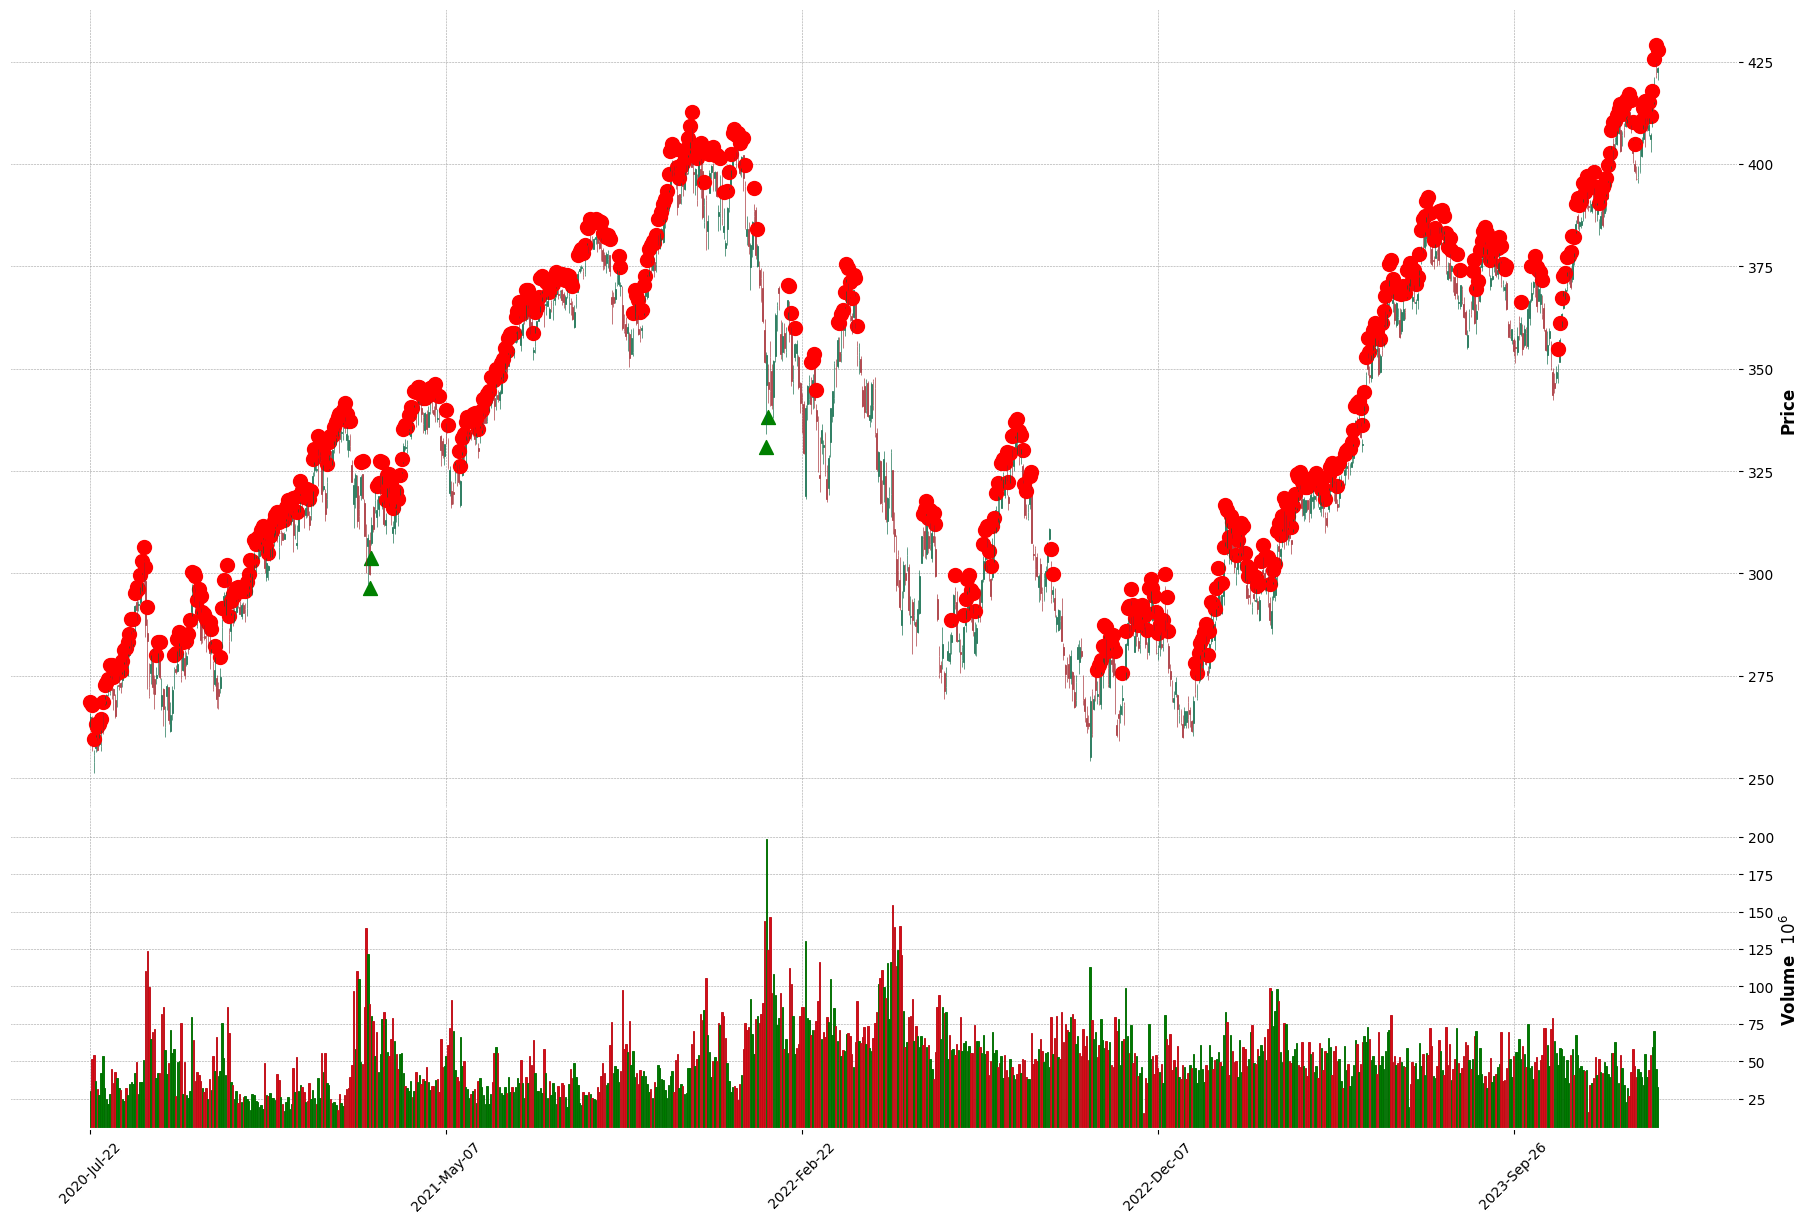

In [19]:
predictions_up_series = pd.Series(Y_up_prediction.flatten(), index=df.index)
buy_signals = np.full(df.shape[0], np.nan)  # 含 NaN 的数组，与 df 的长度一致
buy_signals[predictions_up_series > 0.9] = df['low'][predictions_up_series > 0.9] * 0.99
buy_markers = mpf.make_addplot(buy_signals, type='scatter', markersize=100, marker='^', color='g')

predictions_down_series = pd.Series(Y_down_prediction.flatten(), index=df.index)
sell_signals = np.full(df.shape[0], np.nan)  # 含 NaN 的数组，与 df 的长度一致
sell_signals[predictions_down_series > 0.9] = df['high'][predictions_down_series > 0.9] * 1.01
sell_markers = mpf.make_addplot(sell_signals, type='scatter', markersize=100, marker='o', color='r')

mpf.plot(df, type='candle', style='charles', addplot=[buy_markers, sell_markers], volume=True, figsize=(24, 16))